In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
data = pd.read_csv('news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
print(data['title'][0])
print(data['text'][0])

You Can Smell Hillary’s Fear
Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 
But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. 
The FBI’s leadership is bein

In [5]:
data["label"].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

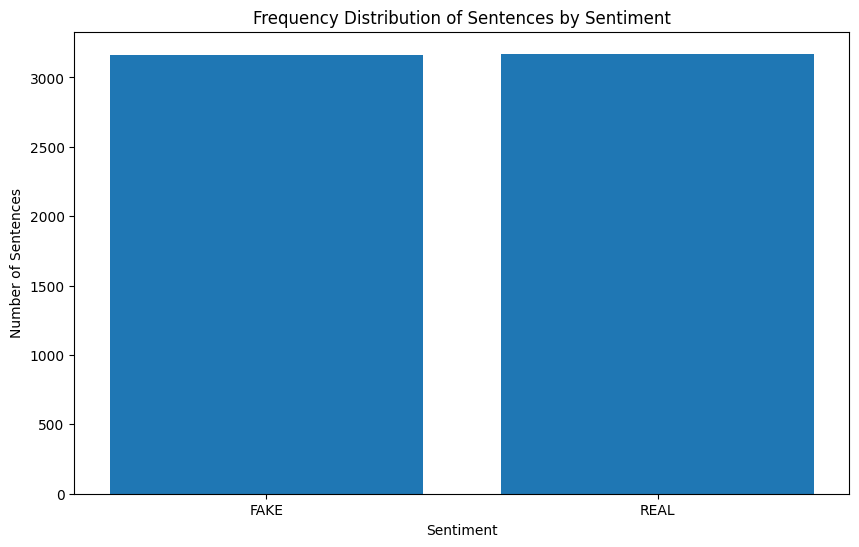

In [6]:
sentiment_counts = data.groupby('label')['text'].count()

plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Sentences')
plt.title('Frequency Distribution of Sentences by Sentiment')
plt.show()

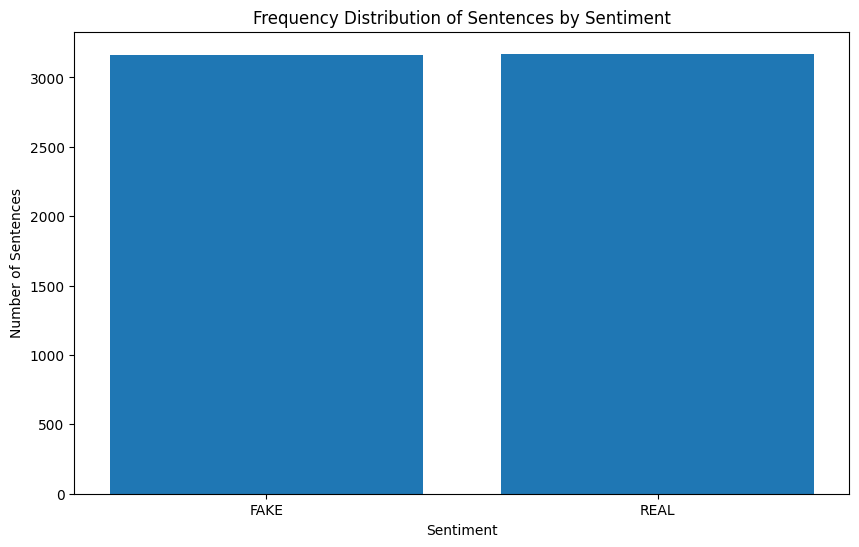

In [7]:
sentiment_counts = data.groupby('label')['text'].count()

plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Sentences')
plt.title('Frequency Distribution of Sentences by Sentiment')
plt.show()

In [8]:
label_encoder = LabelEncoder()

data['label'] = label_encoder.fit_transform(data['label'])

data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


{}
{'the': 1, 'to': 2, 'of': 3, 'and': 4, 'a': 5, 'in': 6, 'that': 7, 'is': 8, 'for': 9, 'on': 10, 'as': 11, 'it': 12, 'with': 13, 'he': 14, 'was': 15, 'are': 16, 'be': 17, 'this': 18, 'by': 19, 'have': 20, '”': 21, 'not': 22, 'his': 23, 'has': 24, 'at': 25, 'said': 26, 'but': 27, 'from': 28, 'trump': 29, 'they': 30, 'an': 31, 'who': 32, 'i': 33, 'will': 34, 'we': 35, 'clinton': 36, 'or': 37, 'you': 38, 'about': 39, 'their': 40, 'more': 41, 'would': 42, 'all': 43, 'one': 44, 'been': 45, 'her': 46, 'people': 47, 'if': 48, 'what': 49, 'she': 50, 'were': 51, 'had': 52, 'which': 53, 'out': 54, 'so': 55, 'when': 56, 'new': 57, 'up': 58, 'there': 59, 'state': 60, 'no': 61, '—': 62, 'than': 63, 'can': 64, 'president': 65, 'also': 66, 'our': 67, 'us': 68, 'other': 69, 'campaign': 70, 'after': 71, 'do': 72, 'just': 73, 'over': 74, 'some': 75, 'like': 76, 'its': 77, 'time': 78, 'them': 79, 'into': 80, 'obama': 81, 'hillary': 82, 'could': 83, 'now': 84, 'even': 85, 'states': 86, 'only': 87, 'him'

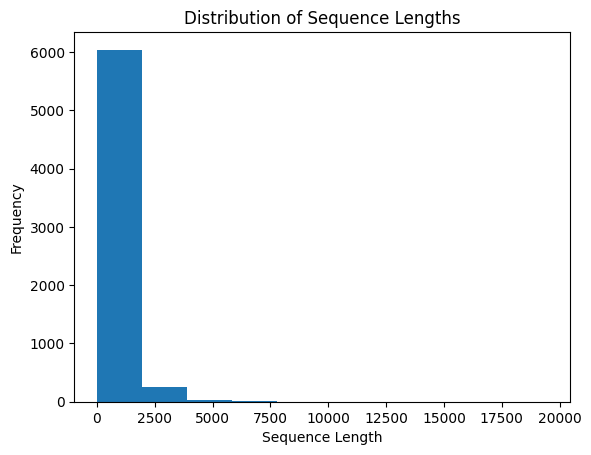

In [9]:
tokenizer = Tokenizer(num_words=10000)
print(tokenizer.word_index)
tokenizer.fit_on_texts(data['text'])
print(tokenizer.word_index)
sequences = tokenizer.texts_to_sequences(data['text'])
word_index = tokenizer.word_index

print(len(word_index))
sequence_lengths = [len(seq) for seq in sequences]

plt.hist(sequence_lengths)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

In [10]:
print(max(sequence_lengths))

19494


In [11]:
padded_sequences = pad_sequences(sequences, maxlen=1500, padding='post', truncating='post')

X_train, X_temp, y_train, y_temp = train_test_split(
    padded_sequences, data['label'], test_size=0.2, random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout, Conv1D

model = Sequential([
    Embedding(input_dim=len(word_index)+1, output_dim=32),
    Conv1D(32, 5, padding='valid',strides=3, activation='relu'),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
EPOCHS = 10
BATCH_SIZE = 64

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - accuracy: 0.6134 - loss: 0.6566 - val_accuracy: 0.7965 - val_loss: 0.4177
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.8748 - loss: 0.2847 - val_accuracy: 0.9432 - val_loss: 0.1510
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9820 - loss: 0.0639 - val_accuracy: 0.9353 - val_loss: 0.1759
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.9965 - loss: 0.0185 - val_accuracy: 0.9464 - val_loss: 0.1744
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9988 - loss: 0.0067 - val_accuracy: 0.9495 - val_loss: 0.2124


In [16]:
loss, accuracy = model.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9317 - loss: 0.1789


In [17]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1500, 32)       │     3,162,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 499, 32)        │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 499, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15968)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,044,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,634,469 (59.64 MB)

 Trainable params: 5,211,489 (19.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,422,980 (39.76 MB)

None


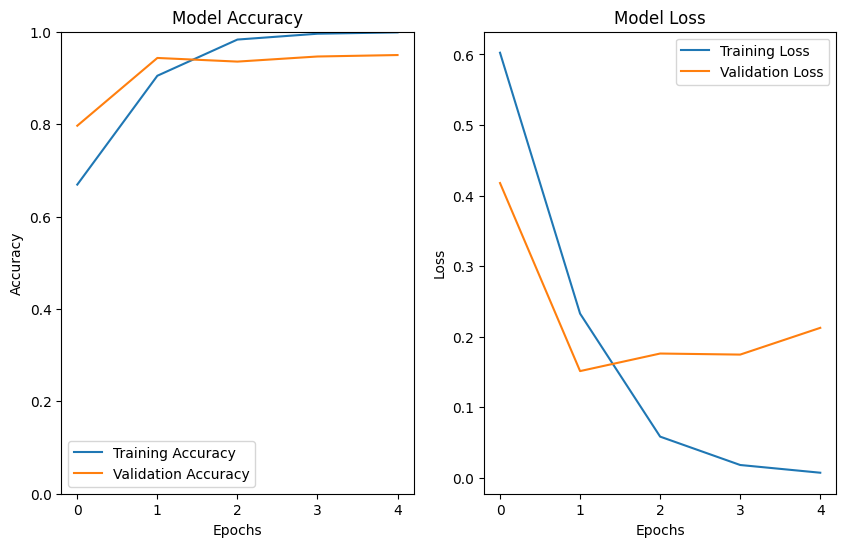

In [18]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.ylim((0,1))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
labels = {
    0: 'FAKE',
    1: 'REAL',
}

y_pred = model.predict(X_test)
y_pred_classes =  [1 if p >= 0.5 else 0 for p in y_pred]


for i in range(10):
    print(f"Example {i+1}: Actual Label - {labels[y_test.iloc[i]]}, Predicted Label - {labels[y_pred_classes[i]]} {labels[y_pred_classes[i]] == labels[y_test.iloc[i]]}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Example 1: Actual Label - FAKE, Predicted Label - FAKE True
Example 2: Actual Label - FAKE, Predicted Label - FAKE True
Example 3: Actual Label - REAL, Predicted Label - REAL True
Example 4: Actual Label - REAL, Predicted Label - REAL True
Example 5: Actual Label - REAL, Predicted Label - REAL True
Example 6: Actual Label - REAL, Predicted Label - FAKE False
Example 7: Actual Label - REAL, Predicted Label - REAL True
Example 8: Actual Label - REAL, Predicted Label - REAL True
Example 9: Actual Label - FAKE, Predicted Label - FAKE True
Example 10: Actual Label - REAL, Predicted Label - FAKE False


In [28]:
model.save('model.keras')